# Exercise 9

## Mashable news stories analysis

Predicting if a news story is going to be popular


In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/mashable.csv'
train_df= pd.read_csv(url, index_col=0)
train_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [2]:
train_df.shape

(6000, 61)

In [3]:
X = train_df.drop(['url', 'Popular'], axis=1)
y = train_df['Popular']

In [4]:
y.mean()

0.5

In [5]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Exercise 9.1

Estimate a Decision Tree Classifier and a Logistic Regresion

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [6]:
# build a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9,solver='liblinear',multi_class='auto')
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='auto', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [7]:
y_pred_=logreg.predict(X_test)

Text(0, 0.5, 'RMSE (lower is better)')

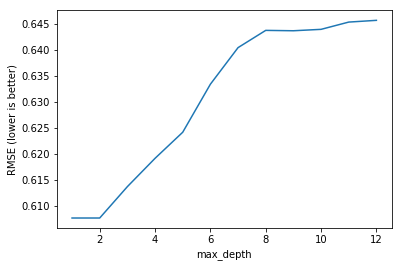

In [8]:
# build Tree Classifier
# instantiate a DecisionTreeClassifier (with random_state=1)
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

treeregressor = DecisionTreeClassifier(random_state=1)
treeregressor



# list of values to try
max_depth_range = range(1,13)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeClassifier(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X_train, y_train, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))


%matplotlib inline
import matplotlib.pyplot as plt
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [9]:
# max_depth=2 was best, so fit a tree using that parameter
treereg = DecisionTreeClassifier(max_depth=2, random_state=1)
treereg.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

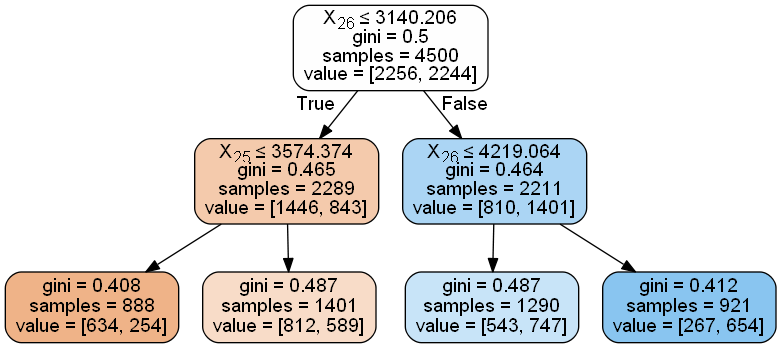

In [10]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(treereg, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [11]:
# use fitted model to make predictions on testing data
from sklearn.metrics import f1_score,accuracy_score
y_pred = treereg.predict(X_test)
y_pred

print('F1-Score: \n',f1_score(y_test,y_pred_))
print('Accuracy: \n', accuracy_score(y_test,y_pred))

F1-Score: 
 0.6146341463414634
Accuracy: 
 0.6453333333333333


In [12]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score 

print('F1-Score: \n',f1_score(y_test,y_pred_))
print('Accuracy: \n', accuracy_score(y_test,y_pred_))

F1-Score: 
 0.6146341463414634
Accuracy: 
 0.6313333333333333


# Exercise 9.2

Estimate 300 bagged samples

Estimate the following set of classifiers:

* 100 Decision Trees where max_depth=None
* 100 Decision Trees where max_depth=2
* 100 Logistic Regressions

In [13]:
# instruct BaggingRegressor to use DecisionTreeRegressor as the "base estimator"
from sklearn.ensemble import BaggingRegressor
bagreg = BaggingRegressor(DecisionTreeClassifier(), n_estimators=100, 
                          bootstrap=True, oob_score=True, random_state=1)


In [14]:
# fit and predict
bagreg.fit(X_train, y_train)
y_pred = bagreg.predict(X_test)
y_pred

array([0.83, 0.65, 0.54, ..., 0.55, 0.47, 0.34])

In [15]:
# Evaluate each model
from sklearn.metrics import mean_squared_error
# calculate RMSE
print('MSE \n',np.sqrt(mean_squared_error(y_test, y_pred)))
print('F1-Score: \n',f1_score(y_test,y_pred_))
print('Accuracy: \n', accuracy_score(y_test,y_pred_))

MSE 
 0.468749399999616
F1-Score: 
 0.6146341463414634
Accuracy: 
 0.6313333333333333


In [16]:
# instruct BaggingRegressor to use DecisionTreeRegressor as the "base estimator"
from sklearn.ensemble import BaggingRegressor
bagreg = BaggingRegressor(DecisionTreeClassifier(max_depth=2, random_state=1), n_estimators=100, 
                          bootstrap=True, oob_score=True, random_state=1)


In [17]:
# fit and predict
bagreg.fit(X_train, y_train)
y_pred = bagreg.predict(X_test)
y_pred

array([1.  , 1.  , 1.  , ..., 0.99, 0.01, 0.  ])

In [18]:
# Evaluate each model
from sklearn.metrics import mean_squared_error
# calculate RMSE
print('MSE \n',np.sqrt(mean_squared_error(y_test, y_pred)))
print('F1-Score: \n',f1_score(y_test,y_pred_))
print('Accuracy: \n', accuracy_score(y_test,y_pred_))

MSE 
 0.5675726091582174
F1-Score: 
 0.6146341463414634
Accuracy: 
 0.6313333333333333


In [19]:
# instruct BaggingRegressor to use DecisionTreeRegressor as the "base estimator"
from sklearn.ensemble import BaggingRegressor
bagreg = BaggingRegressor(LogisticRegression(C=1e9,solver='liblinear',multi_class='auto'), n_estimators=100, 
                          bootstrap=True, oob_score=True, random_state=1)

In [20]:
# fit and predict
bagreg.fit(X_train, y_train)
y_pred = bagreg.predict(X_test)
y_pred

array([1.  , 1.  , 1.  , ..., 0.86, 0.  , 0.  ])

In [21]:
# Evaluate each model
from sklearn.metrics import mean_squared_error
# calculate RMSE
print('MSE \n',np.sqrt(mean_squared_error(y_test, y_pred)))
print('F1-Score: \n',f1_score(y_test,y_pred_))
print('Accuracy: \n', accuracy_score(y_test,y_pred_))

MSE 
 0.5794064779294987
F1-Score: 
 0.6146341463414634
Accuracy: 
 0.6313333333333333


# Exercise 9.3

Ensemble using majority voting

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [22]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

In [23]:
from sklearn.metrics import f1_score,accuracy_score
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_score(y_pred, y_test), accuracy_score(y_pred, y_test)

(0.6447368421052632, 0.64)

# Exercise 9.4

Estimate te probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Score

In [24]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

from sklearn.metrics import f1_score,accuracy_score
clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=-1, oob_score=True,
         random_state=42, verbose=0, warm_start=False)

In [25]:
y_pred = (clf.predict_proba(X_test)[:,1]>=0.4).astype(bool)
f1_score(y_pred, y_test)

0.6983606557377048

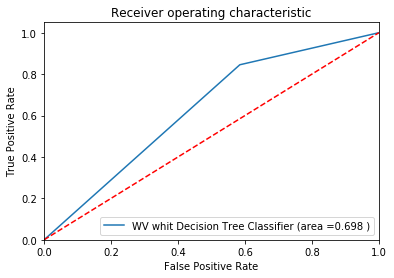

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, (clf.predict_proba(X_test)[:,1]>=0.4).astype(bool))
plt.figure()
plt.plot(fpr, tpr, label='WV whit Decision Tree Classifier (area =0.698 )' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


# Exercise 9.5

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [27]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=-1, oob_score=True,
         random_state=42, verbose=0, warm_start=False)

In [28]:
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

In [29]:
f1_score(y_pred, y_test), accuracy_score(y_pred, y_test)

(0.6505867014341591, 0.6426666666666667)

# Exercise 9.6
Estimate te probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

In [30]:
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.3).astype(np.int)

In [31]:
f1_score(y_pred, y_test)

0.6987593052109181

# Exercise 9.7

Estimate a logistic regression using as input the estimated classifiers

Modify the probability threshold such that maximizes the F1-Score

In [32]:
from sklearn.linear_model import LogisticRegressionCV

y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))
X_train_3 = np.zeros((X_train.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):

    X_train_3[:, i] = clf.estimators_[i].predict(X_train)
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
lr = LogisticRegressionCV(cv=5)
lr.fit(X_train_3, y_train)


LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [33]:
y_pred= (lr.predict_proba(y_pred_all_)[:,1]>=0.4).astype(bool)
f1_score(y_pred, y_test)


0.6968716289104638

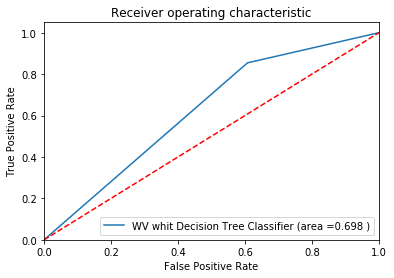

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(y_pred_all_))
fpr, tpr, thresholds = roc_curve(y_test, (lr.predict_proba(y_pred_all_)[:,1]>=0.4).astype(bool))
plt.figure()
plt.plot(fpr, tpr, label='WV whit Decision Tree Classifier (area =0.698 )' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()